In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os

In [ ]:
# Specify the directory where your files are located
folder_path = '/content/drive/My Drive/Assignment 03'


# Define the column names
column_names = ['order_id', 'driver_id', 'passenger_id', 'start_region_hash', 'dest_region_hash', 'price', 'time']

# List to hold all the dataframes
dfs = []

# Loop through each file in the directory
for i in range(1, 3):  # from 01 to 21
    file_name = f'order_data_2016-01-{i:02}.xlsx'  # Ensures numbers are formatted as 01, 02,..., 21
    file_path = os.path.join(folder_path, file_name)

    # Check if the file exists to avoid errors
    if os.path.exists(file_path):
        # Read the file into a dataframe, specifying there is no header and setting the column names
        df = pd.read_excel(file_path, header=None, names=column_names)
        # Append the dataframe to the list
        dfs.append(df)
    else:
        print(f"File not found: {file_name}")

# Concatenate all dataframes into one
order_data = pd.concat(dfs, ignore_index=True)

# Display the combined dataframe
order_data.head()


,order_id,driver_id,passenger_id,start_region_hash,dest_region_hash,price,time
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24.0,2016-01-01 13:37:23
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2.0,2016-01-01 09:47:54
2,abeefc3e2aec952468e2fd42a1649640,86dbc1b68de435957c61b5a523854b69,7029e813bb3de8cc73a8615e2785070c,fff4e8465d1e12621bc361276b6217cf,fff4e8465d1e12621bc361276b6217cf,9.0,2016-01-01 18:24:02
3,cb31d0be64cda3cc66b46617bf49a05c,4fadfa6eeaa694742de036dddf02b0c4,21dc133ac68e4c07803d1c2f48988a83,4b7f6f4e2bf237b6cc58f57142bea5c0,4b7f6f4e2bf237b6cc58f57142bea5c0,11.0,2016-01-01 22:13:27
4,139d492189ae5a933122c098f63252b3,NaN,26963cc76da2d8450d8f23fc357db987,fc34648599753c9e74ab238e9a4a07ad,87285a66236346350541b8815c5fae94,4.0,2016-01-01 17:00:06


In [ ]:
order_data.shape

(823571, 7)

In [ ]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823571 entries, 0 to 823570
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_id           823571 non-null  object        
 1   driver_id          612235 non-null  object        
 2   passenger_id       823571 non-null  object        
 3   start_region_hash  823571 non-null  object        
 4   dest_region_hash   823571 non-null  object        
 5   price              823571 non-null  float64       
 6   time               823571 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 44.0+ MB


In [ ]:
order_data.describe().T

,count,mean,min,25%,50%,75%,max,std
price,823571.0,18.632872,0.0,8.1,14.0,23.0,499.0,16.793238
time,823571,2016-01-01 22:41:51.637644544,2016-01-01 00:00:03,2016-01-01 11:26:05,2016-01-01 18:50:43,2016-01-02 13:26:53.500000,2016-01-02 23:59:57,NaN


In [ ]:
order_data.isnull().sum()

order_id                  0
driver_id            211336
passenger_id              0
start_region_hash         0
dest_region_hash          0
price                     0
time                      0
dtype: int64

In [ ]:
order_data.nunique()

order_id             819575
driver_id             44227
passenger_id         368899
start_region_hash        66
dest_region_hash        433
price                  1297
time                 154988
dtype: int64

In [ ]:
column_names = ['region_hash', 'region_id']
region_data = pd.read_excel("/content/drive/My Drive/Assignment 03/cluster_map.xlsx", header=None, names=column_names)
region_data.head()

,region_hash,region_id
0,90c5a34f06ac86aee0fd70e2adce7d8a,1
1,f2c8c4bb99e6377d21de71275afd6cd2,2
2,58c7a4888306d8ff3a641d1c0feccbe3,3
3,b26a240205c852804ff8758628c0a86a,4
4,4b9e4cf2fbdc8281b8a1f9f12b80ce4d,5


In [ ]:
region_data.shape

(66, 2)

In [ ]:
region_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   region_hash  66 non-null     object
 1   region_id    66 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
data = order_data.copy()
data.head()

,order_id,driver_id,passenger_id,start_region_hash,dest_region_hash,price,time
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24.0,2016-01-01 13:37:23
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2.0,2016-01-01 09:47:54
2,abeefc3e2aec952468e2fd42a1649640,86dbc1b68de435957c61b5a523854b69,7029e813bb3de8cc73a8615e2785070c,fff4e8465d1e12621bc361276b6217cf,fff4e8465d1e12621bc361276b6217cf,9.0,2016-01-01 18:24:02
3,cb31d0be64cda3cc66b46617bf49a05c,4fadfa6eeaa694742de036dddf02b0c4,21dc133ac68e4c07803d1c2f48988a83,4b7f6f4e2bf237b6cc58f57142bea5c0,4b7f6f4e2bf237b6cc58f57142bea5c0,11.0,2016-01-01 22:13:27
4,139d492189ae5a933122c098f63252b3,NaN,26963cc76da2d8450d8f23fc357db987,fc34648599753c9e74ab238e9a4a07ad,87285a66236346350541b8815c5fae94,4.0,2016-01-01 17:00:06


In [ ]:
data.shape

(823571, 7)

In [ ]:
# Calculate the time slot by extracting hour and minute, converting to total minutes and dividing by 10
data['time_slot'] = data['time'].apply(lambda x: f"{x.strftime('%Y-%m-%d')}-{(x.hour * 60 + x.minute) // 10 + 1}")

# Merge with region_data to get the region_id
data = data.merge(region_data, how='left', left_on='start_region_hash', right_on='region_hash')

# Calculate demand, supply, and gap
# Demand: Count of orders by region_id and time_slot
demand = data.groupby(['region_id', 'time_slot']).size().reset_index(name='demand')

# Supply: Count of orders where driver_id is not null by region_id and time_slot
supply = data[data['driver_id'].notnull()].groupby(['region_id', 'time_slot']).size().reset_index(name='supply')

# Merge demand and supply
result = pd.merge(demand, supply, on=['region_id', 'time_slot'], how='left')

# Fill NaN in supply with 0 (since NaN means no orders were accepted)
result['supply'] = result['supply'].fillna(0).astype(int)

# Calculate gap
result['gap'] = result['demand'] - result['supply']

# Display the resulting DataFrame
result.head()


,region_id,time_slot,demand,supply,gap
0,1,2016-01-01-1,187,178,9
1,1,2016-01-01-10,111,105,6
2,1,2016-01-01-100,274,269,5
3,1,2016-01-01-101,279,274,5
4,1,2016-01-01-102,238,235,3


In [ ]:
result.shape

(16044, 5)

In [ ]:
result.head()

,region_id,time_slot,demand,supply,gap
0,1,2016-01-01-1,187,178,9
1,1,2016-01-01-10,111,105,6
2,1,2016-01-01-100,274,269,5
3,1,2016-01-01-101,279,274,5
4,1,2016-01-01-102,238,235,3


In [ ]:
result.nunique()

region_id     66
time_slot    288
demand       568
supply       463
gap          318
dtype: int64

In [ ]:
df = result.copy()

In [ ]:
df.tail()

,region_id,time_slot,demand,supply,gap
16039,66,2016-01-02-95,21,21,0
16040,66,2016-01-02-96,27,26,1
16041,66,2016-01-02-97,29,27,2
16042,66,2016-01-02-98,19,17,2
16043,66,2016-01-02-99,24,22,2


In [ ]:
# Extract day and slot number from 'time_slot'
df['day'] = df['time_slot'].apply(lambda x: int(x.split('-')[2]))
df['slot'] = df['time_slot'].apply(lambda x: int(x.split('-')[3]))

df.head()

,region_id,time_slot,demand,supply,gap,day,slot
0,1,2016-01-01-1,187,178,9,1,1
1,1,2016-01-01-10,111,105,6,1,10
2,1,2016-01-01-100,274,269,5,1,100
3,1,2016-01-01-101,279,274,5,1,101
4,1,2016-01-01-102,238,235,3,1,102


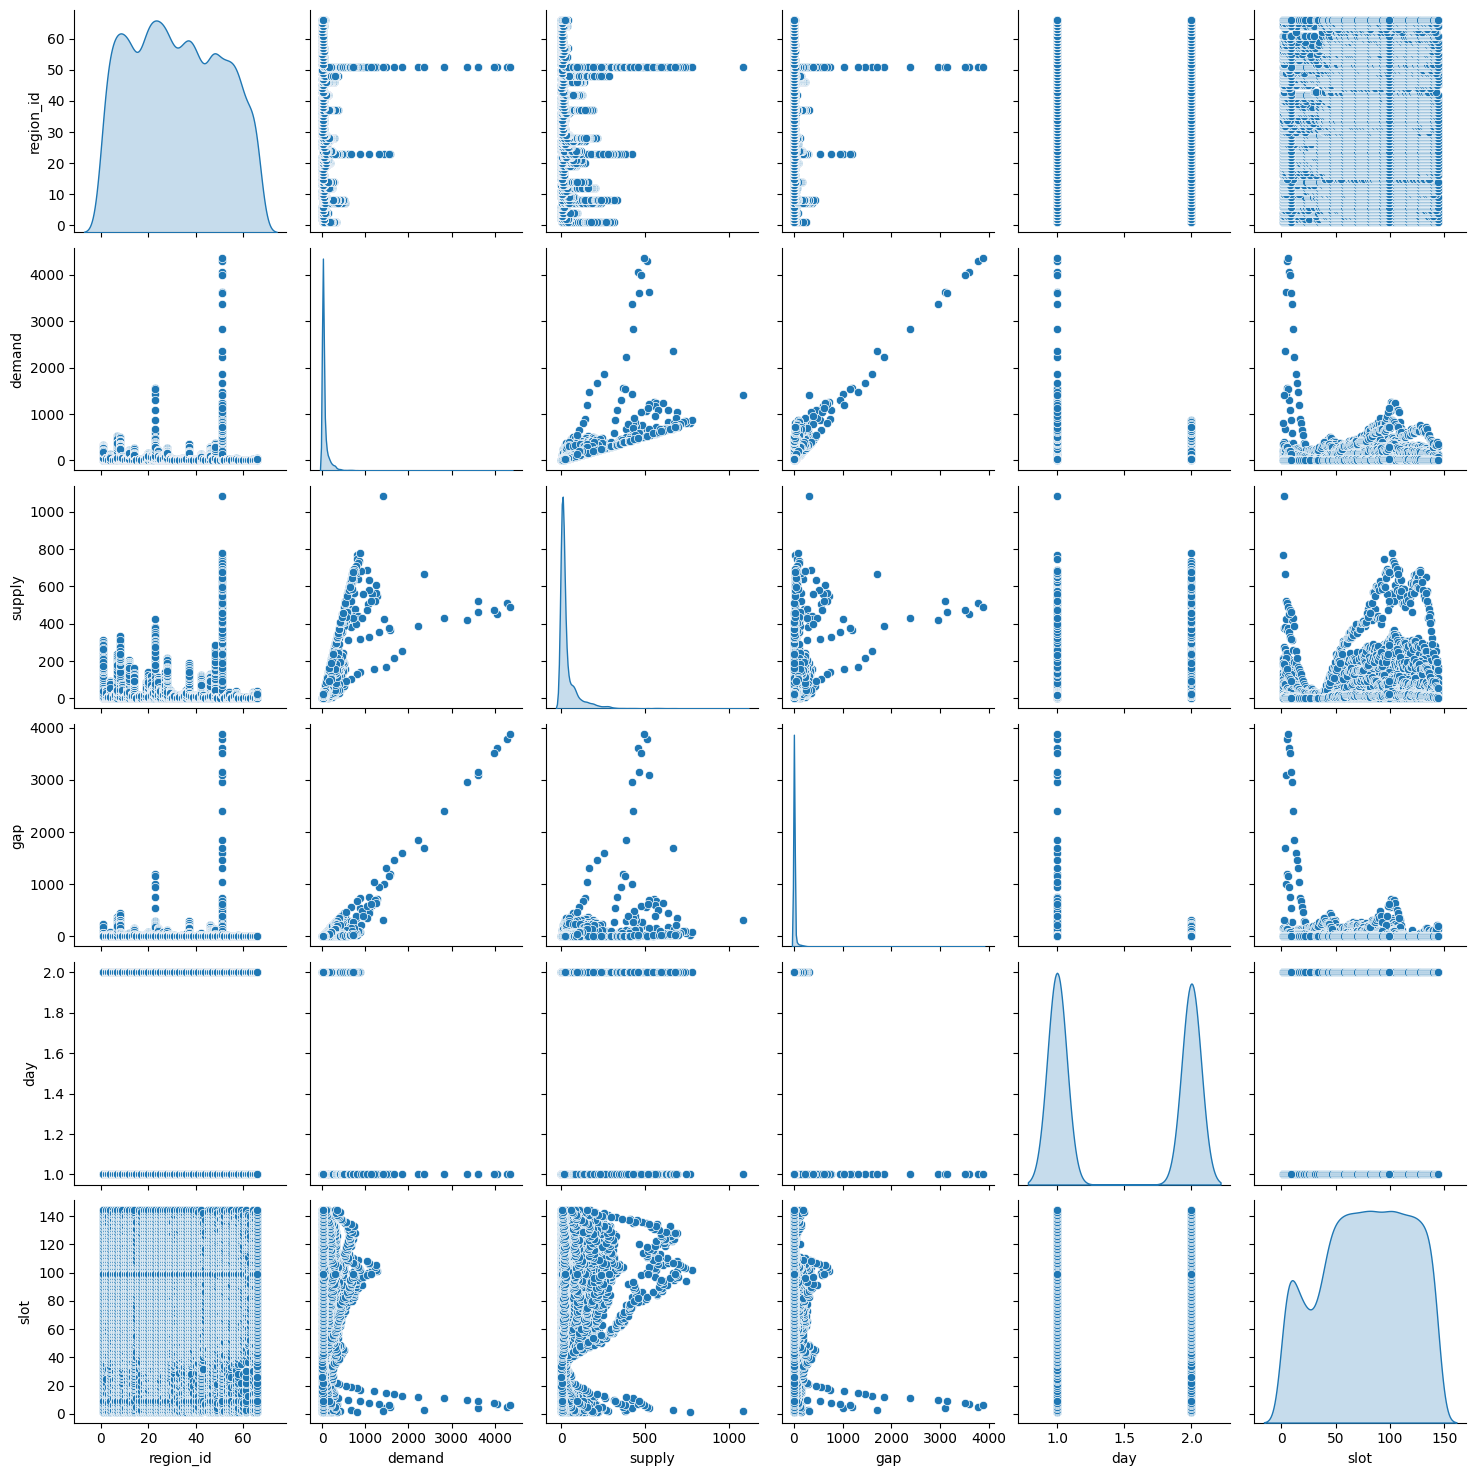

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of histogram on the diag

<Axes: >

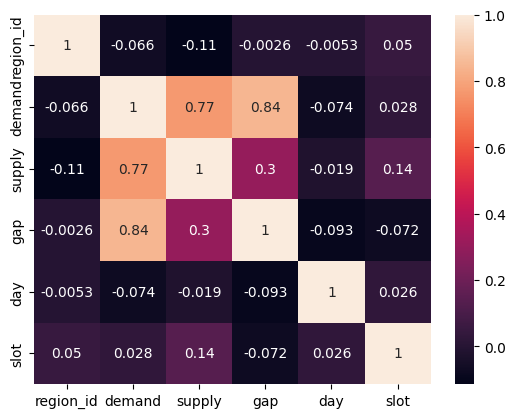

In [ ]:
df1 = df.drop(['time_slot'], axis=1)
sns.heatmap(df1.corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge

# Prepare features and target variable
X = df[['region_id', 'day', 'slot']]
y = df['gap']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the prediction
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Accuracy Score:", model.score(X_test, y_test))

Mean Squared Error: 6803.743703705931
Accuracy Score: 0.0145527044629844


In [ ]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create KNN classifier
# The number of neighbors, n_neighbors, can be tuned
knn = KNeighborsClassifier(n_neighbors=2)

# Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Predicting on the test data
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3381803074366431


In [ ]:
# Initialize Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization strength; larger values specify stronger regularization.

# Fit the model
ridge_reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate and print the mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE for Ridge Regression:", mse_ridge)
ridge_reg.score(X_test, y_test)

MSE for Ridge Regression: 6803.741553104099


0.014553015953959414

In [ ]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_reg = Lasso(alpha=0.1)  # Alpha here also controls the degree of sparsity of the coefficients learned.

# Fit the model
lasso_reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lasso = lasso_reg.predict(X_test)

# Calculate and print the mean squared error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("MSE for Lasso Regression:", mse_lasso)
print("Accuracy Score:", ridge_reg.score(X_test, y_test))

MSE for Lasso Regression: 6803.633628604622
Accuracy Score: 0.014553015953959414


In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
y_pred = dTree.predict(X_test)
print("Accuracy Score:", dTree.score(X_test, y_test))

Accuracy Score: 0.27440797673452433


In [ ]:
# Re-index y_test to align properly with y_pred for concatenation
y_pred_df = pd.DataFrame(y_pred, columns=['predicted_gap'])
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

# Concatenate X_test (reset its index for alignment) with y_test_df and y_pred_df
test_results = pd.concat([X_test.reset_index(drop=True), y_test_df, y_pred_df], axis=1)

# Print the results to see actual and predicted values alongside the test features
test_results.tail()


,region_id,day,slot,gap,predicted_gap
4809,46,2,59,81,36
4810,66,2,56,0,0
4811,27,2,124,2,4
4812,12,2,34,2,1
4813,59,2,97,1,0


In [ ]:
# 1. Prepare features for prediction
# Create a DataFrame for the next 3 days
new_data = pd.DataFrame({
    'region_id': [1, 9, 28],  # Replace with the region ID for the next 3 days
    'day': [10, 11, 12],         # Replace with the day number for the next 3 days
    'slot': [79, 5, 38]     # Replace with the slot number for the next 3 days
})

# 2. Scale the features
# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# 3. Predict the gap
# Use the trained KNN model to predict the demand-supply gap
predicted_gap = knn.predict(new_data_scaled)

# Add predicted_gap to the new_data DataFrame
new_data['predicted_gap'] = predicted_gap

# Print the DataFrame
new_data



,region_id,day,slot,predicted_gap
0,1,10,79,3
1,9,11,5,1
2,28,12,38,6
